In [2]:
import pandas as pd

dataset = pd.read_csv('Baltimore911.csv')
dataset

C:\Users\shaja\AppData\Local\Temp\ipykernel_7540\3987010139.py:3: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,2/8/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312.0,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,2/8/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333.0,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,2/8/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,2/8/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,2/8/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314.0,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292756,1/1/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492,NaN,ROW/TOWNHOUSE-OCC,NaN,1
292757,5/1/1977,0:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.626880,39.328817,NaN,ROW/TOWNHOUSE-OCC,NaN,1
292758,6/1/1975,0:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691297,39.289582,NaN,OTHER - INSIDE,NaN,1
292759,7/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635300,39.358898,NaN,NaN,NaN,1


In [12]:
# Data cleaning and preprocessing
dataset['CrimeDate'] = pd.to_datetime(dataset['CrimeDate'], errors='coerce')  # Convert CrimeDate to datetime, handle errors
dataset.dropna(subset=['CrimeDate'], inplace=True)  # Drop rows where CrimeDate is missing
dataset['Year'] = dataset['CrimeDate'].dt.year  # Extract Year
dataset['Month'] = dataset['CrimeDate'].dt.month  # Extract Month
dataset['DayOfWeek'] = dataset['CrimeDate'].dt.dayofweek  # Extract Day of Week (Monday=0, Sunday=6)

# Create an empty dictionary to store column-wise information
profile_table = {
    "Column Name": [],
    "Data Type": [],
    "Numeric": [],
    "Min": [],
    "Max": [],
    "Mean": [],
    "Median": [],
    "Standard Deviation": [],
    "Unique Values": [],
    "Top Value 1": [],
    "Top Value 2": [],
    "Top Value 3": [],
    "Missingness (%)": []
}

# Iterate through columns and gather information
for column in dataset.columns:
    # Data type
    data_type = dataset[column].dtype
    
    # Numeric or symbolic
    numeric = True if data_type in [int, float] else False
    
    # Min, Max, Mean, Median, Standard Deviation (for numeric attributes)
    min_val, max_val, mean_val, median_val, std_dev = None, None, None, None, None
    if numeric:
        min_val = dataset[column].min()
        max_val = dataset[column].max()
        mean_val = dataset[column].mean()
        median_val = dataset[column].median()
        std_dev = dataset[column].std()
    
    # Unique values, Top 3 values (for discrete attributes)
    unique_values = dataset[column].nunique()
    top_values = dataset[column].value_counts().head(3).index.tolist()
    
    # Missingness (%)
    missing_percentage = (dataset[column].isnull().sum() / len(dataset)) * 100
    
    # Add information to the profile table dictionary
    profile_table["Column Name"].append(column)
    profile_table["Data Type"].append(data_type)
    profile_table["Numeric"].append(numeric)
    profile_table["Min"].append(min_val)
    profile_table["Max"].append(max_val)
    profile_table["Mean"].append(mean_val)
    profile_table["Median"].append(median_val)
    profile_table["Standard Deviation"].append(std_dev)
    profile_table["Unique Values"].append(unique_values)
    profile_table["Top Value 1"].append(top_values[0] if top_values else None)
    profile_table["Top Value 2"].append(top_values[1] if len(top_values) > 1 else None)
    profile_table["Top Value 3"].append(top_values[2] if len(top_values) > 2 else None)
    profile_table["Missingness (%)"].append(missing_percentage)

# Create a DataFrame from the profile table dictionary
profile_df = pd.DataFrame(profile_table)

# Print the dataset profile table
print(profile_df)

        Column Name       Data Type  Numeric        Min        Max       Mean  \
0         CrimeDate  datetime64[ns]    False        NaN        NaN        NaN   
1         CrimeTime          object    False        NaN        NaN        NaN   
2         CrimeCode          object    False        NaN        NaN        NaN   
3          Location          object    False        NaN        NaN        NaN   
4       Description          object    False        NaN        NaN        NaN   
5    Inside/Outside          object    False        NaN        NaN        NaN   
6            Weapon          object    False        NaN        NaN        NaN   
7              Post          object    False        NaN        NaN        NaN   
8          District          object    False        NaN        NaN        NaN   
9      Neighborhood          object    False        NaN        NaN        NaN   
10        Longitude         float64     True -81.529189 -76.383228 -76.617452   
11         Latitude         

In [3]:
# Convert 'CrimeDate' to datetime format
dataset['CrimeDate'] = pd.to_datetime(dataset['CrimeDate'])

# Extract year, month, and day of week
dataset['Year'] = dataset['CrimeDate'].dt.year
dataset['Month'] = dataset['CrimeDate'].dt.month
dataset['DayOfWeek'] = dataset['CrimeDate'].dt.dayofweek  # Monday=0, Sunday=6

Matplotlib is building the font cache; this may take a moment.


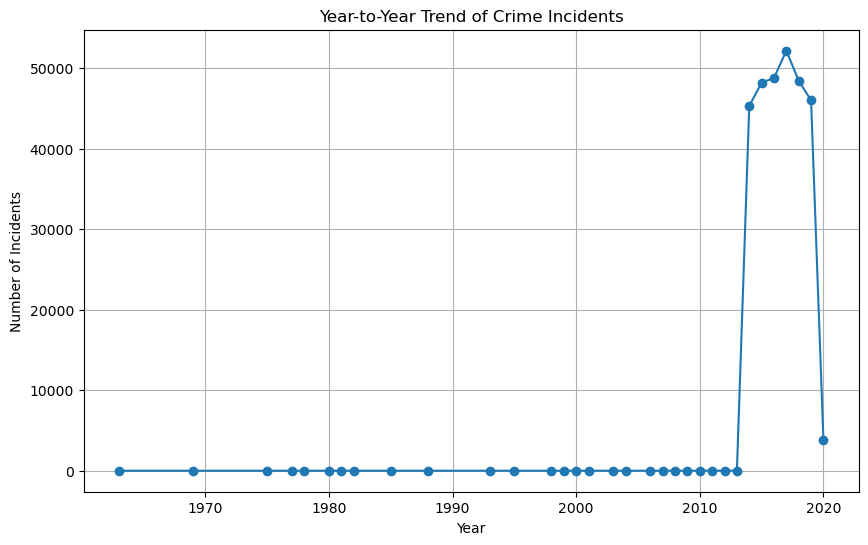

In [4]:
import matplotlib.pyplot as plt

# Group by year and count incidents
yearly_counts = dataset.groupby('Year').size()

# Plot year-to-year trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Year-to-Year Trend of Crime Incidents')
plt.grid(True)
plt.show()

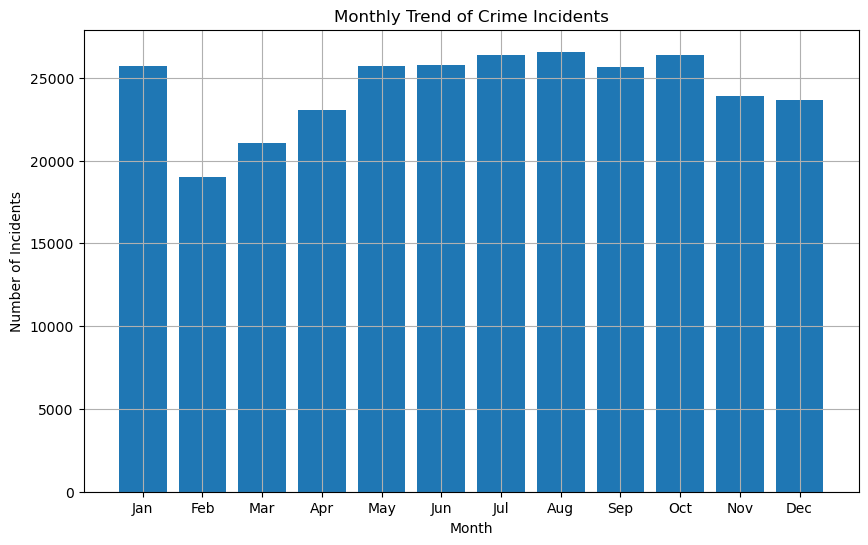

In [5]:
# Group by month and count incidents
monthly_counts = dataset.groupby('Month').size()

# Plot monthly trend
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Trend of Crime Incidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

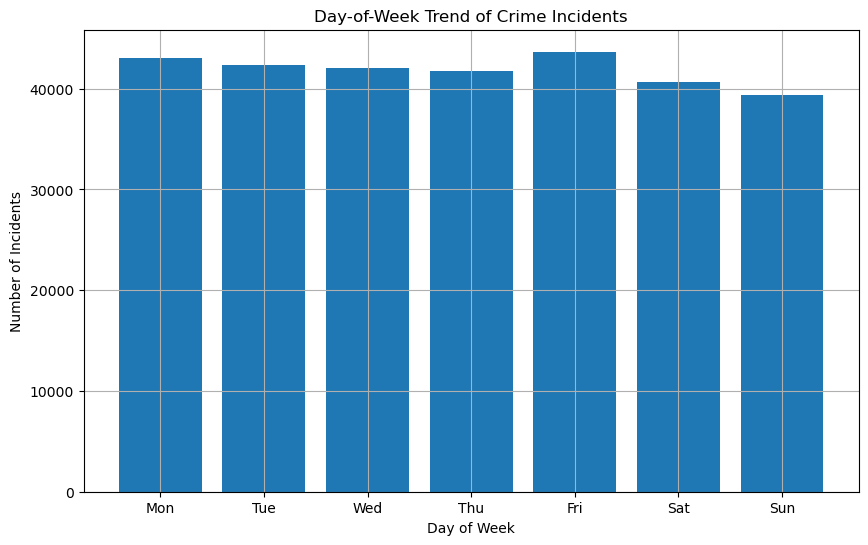

In [6]:
# Group by day of week and count incidents
dayofweek_counts = dataset.groupby('DayOfWeek').size()

# Plot day-of-week trend
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.bar(days, dayofweek_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.title('Day-of-Week Trend of Crime Incidents')
plt.grid(True)
plt.show()

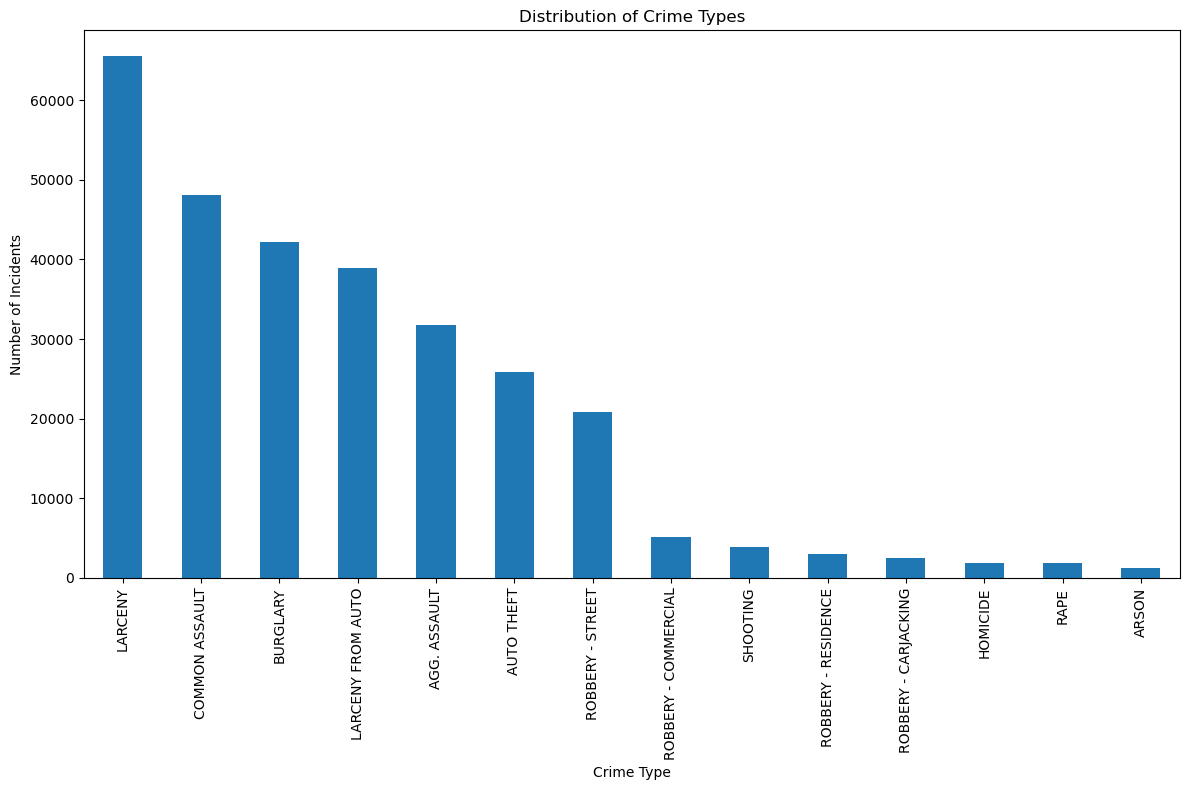

In [7]:
# Group by crime type and count incidents
crime_type_counts = dataset['Description'].value_counts()

# Plot the distribution of crime types
plt.figure(figsize=(12, 8))
crime_type_counts.plot(kind='bar')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Crime Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

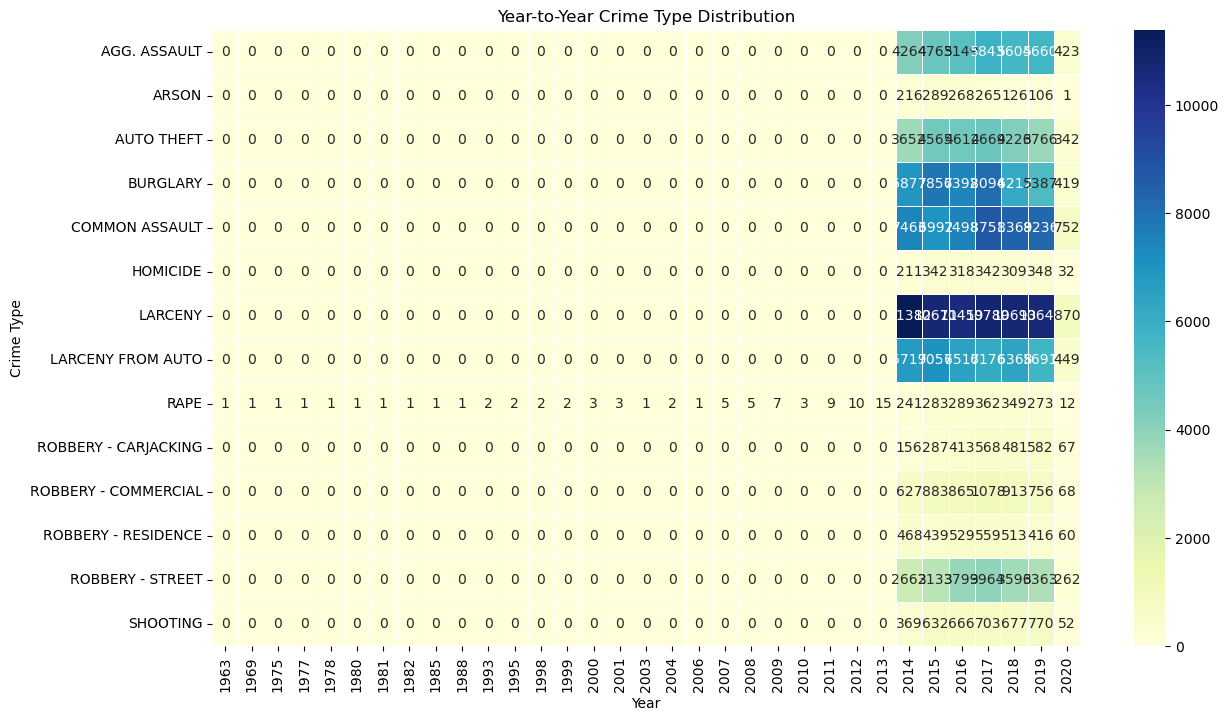

In [8]:
import seaborn as sns

# Group by year and crime type, count incidents
yearly_crime_counts = dataset.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Plot year-to-year crime type distribution
plt.figure(figsize=(14, 8))
sns.heatmap(yearly_crime_counts.T, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Crime Type')
plt.title('Year-to-Year Crime Type Distribution')
plt.show()

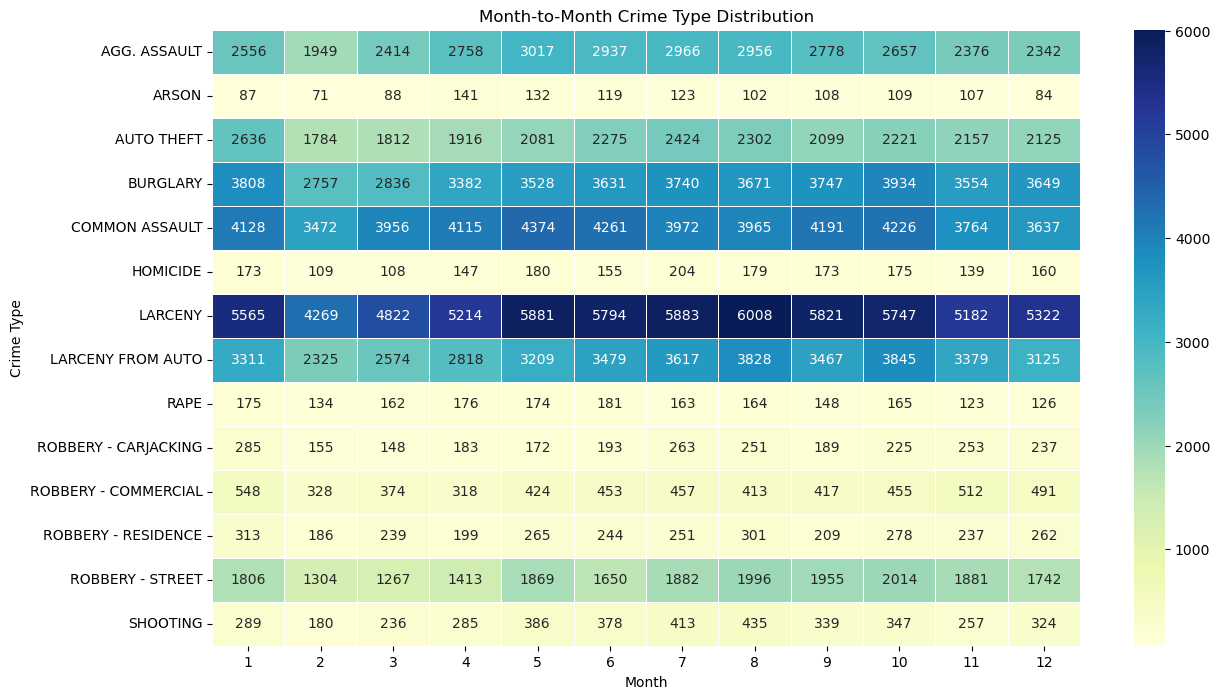

In [9]:
# Group by month and crime type, count incidents
monthly_crime_counts = dataset.groupby(['Month', 'Description']).size().unstack(fill_value=0)

# Plot month-to-month crime type distribution
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_crime_counts.T, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.title('Month-to-Month Crime Type Distribution')
plt.show()

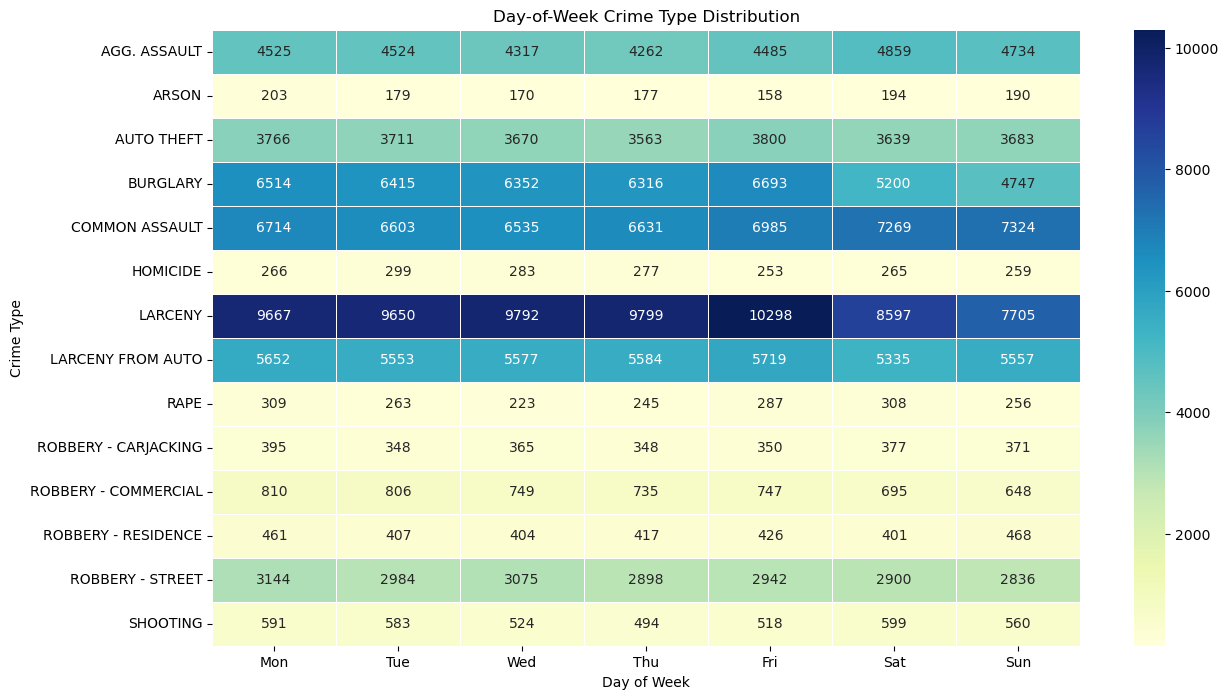

In [10]:
# Group by day of week and crime type, count incidents
dayofweek_crime_counts = dataset.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)

# Plot day-of-week crime type distribution
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(14, 8))
sns.heatmap(dayofweek_crime_counts.T, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=day_names)
plt.xlabel('Day of Week')
plt.ylabel('Crime Type')
plt.title('Day-of-Week Crime Type Distribution')
plt.show()

In [4]:
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

app = Dash(__name__)
app.layout = html.Div([
    html.H1("Crime Patterns Dashboard"),
    
    # Spatial Map
    dcc.Graph(id='crime-map'),
    
    # Temporal Line Chart
    dcc.Graph(id='crime-timeline'),
    
    # Filters
    html.Label("Select Crime Type:"),
    dcc.Dropdown(
        id='crime-type-dropdown',
        options=[{'label': crime_type, 'value': crime_type} for crime_type in dataset['CrimeCode'].unique()],
        value=dataset['CrimeCode'].iloc[0],  # Default value
        multi=True
    )
])
# Callback for crime map
@app.callback(
    Output('crime-map', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_crime_map(selected_crime_types):
    # Ensure selected_crime_types is always a list
    if isinstance(selected_crime_types, str):
        selected_crime_types = [selected_crime_types]
    elif selected_crime_types is None:
        selected_crime_types = []
    
    filtered_data = dataset[dataset['CrimeCode'].isin(selected_crime_types)]
    fig = px.scatter_geo(filtered_data, lat='Latitude', lon='Longitude', color='CrimeCode',
                         hover_name='Description', title='Crime Map')
    return fig

# Callback for crime timeline
@app.callback(
    Output('crime-timeline', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_crime_timeline(selected_crime_types):
    # Ensure selected_crime_types is always a list
    if isinstance(selected_crime_types, str):
        selected_crime_types = [selected_crime_types]
    elif selected_crime_types is None:
        selected_crime_types = []
    
    filtered_data = dataset[dataset['CrimeCode'].isin(selected_crime_types)]
    grouped_filtered_data = filtered_data.groupby('CrimeDate')['Total Incidents'].sum().reset_index()
    fig = px.line(grouped_filtered_data, x='CrimeDate', y='Total Incidents',
                  labels={'Total Incidents': 'Incidents'}, title='Crime Timeline')
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)
